In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
x_train = np.loadtxt('A3data/input.csv', delimiter=',')
y_train = np.loadtxt('A3data/labels.csv', delimiter=',')
x_test = np.loadtxt('A3data/input_test.csv', delimiter=',')
y_test = np.loadtxt('A3data/labels_test.csv', delimiter=',')

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [5]:
print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test sizeb: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (2000, 100, 100, 3)
y_train size:  (2000, 1)
x_test sizeb:  (400, 100, 100, 3)
y_test size:  (400, 1)


In [6]:
x_train = x_train / 255

In [7]:
x_test = x_test / 255

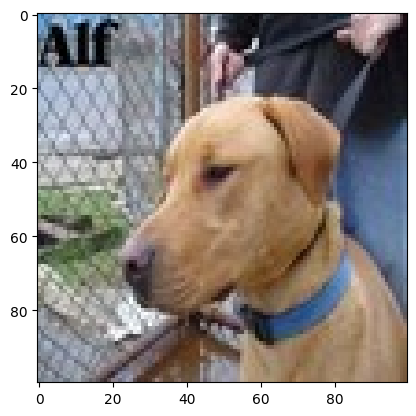

In [8]:
plt.imshow(x_train[999])
plt.show()

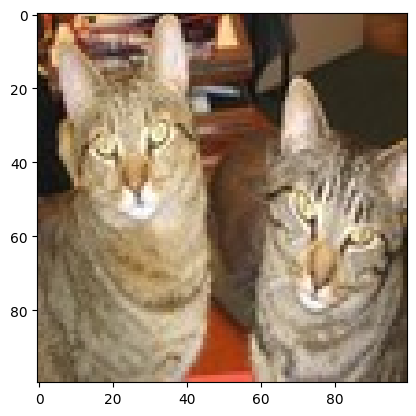

In [9]:
plt.imshow(x_train[1999])
plt.show()

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

D:\PVG COET\BE IT\DL\tensorflow_files\virtualenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
24/32 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.4865 - loss: 0.7354

In [48]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6837 - loss: 1.2292


[1.130017876625061, 0.6899999976158142]

In [51]:
x_train[0]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Model's prediction is dog


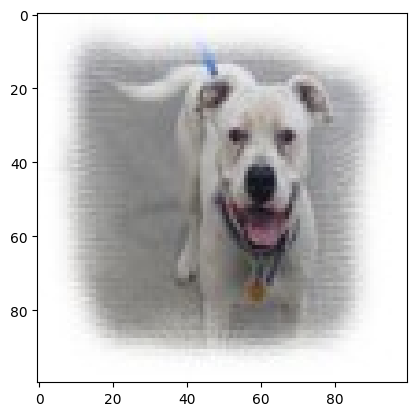

In [157]:
import random
idx = random.randint(0, len(x_train))
y_pred = model.predict(x_train[idx, :].reshape(1, 100, 100, 3))
plt.imshow(x_train[idx])
if y_pred > 0.5:
    print("Model's prediction is cat")
else:
    print("Model's prediction is dog")